In [17]:
import sys
sys.path.append("../lropy")

In [18]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import pandas as pd
import numpy as np
import seaborn as sb
import spiceypy as spice

from datetime import datetime
import glob
import itertools

In [19]:
from lropy.analysis.io import load_simulation_results, load_all_simulation_results, pos_names
from lropy.analysis.spice_tools import generate_lro_ephemeris
from lropy.analysis.plotting import format_plot, save_plot

In [20]:
def calculate_statistics(df):
    """Calculate mean and std around running mean"""
    mean_line = df["panels_vis_ill_moon"].rolling(20).mean()
    mean = df['panels_vis_ill_moon'].mean()
    std = (df["panels_vis_ill_moon"] - mean_line).std()
    return mean, std, mean_line

# Paneling algorithm

Comparison of Wetterer's staggered panel distribution and Saff's spiraling panel distribution

In [21]:
df_spiraling = load_simulation_results("../results/spiraling_vs_staggered/spiraling/")
df_spiraling

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,kepler_a,kepler_e,kepler_i,kepler_argPeri,...,panels_ill_moon,panels_vis_ill_moon,t_et,r,r_sun,acc_grav_moon,acc_grav_earth,acc_grav_sun,acc_rp_sun,acc_rp_moon
t,,,,,,,,,,,,,,,,,,,,,
2010-06-26 06:00:00+00:00,129827.263762,-11849.086027,-1.790239e+06,1629.955691,216.321125,126.742167,1.787270e+06,0.007414,1.554783,0.697884,...,33,33,3.308041e+08,1.794980e+06,1.524555e+11,1.521155,0.000012,6.724166e-08,6.773406e-08,1.224817e-08
2010-06-26 06:00:10+00:00,146121.070439,-9685.380837,-1.788896e+06,1628.782473,216.416904,141.908627,1.787263e+06,0.007413,1.554783,0.698581,...,34,34,3.308041e+08,1.794880e+06,1.524555e+11,1.521239,0.000012,6.723671e-08,6.772830e-08,9.763736e-09
2010-06-26 06:00:20+00:00,162402.450081,-7520.808281,-1.787401e+06,1627.470320,216.494582,157.064408,1.787255e+06,0.007413,1.554783,0.699428,...,34,34,3.308041e+08,1.794780e+06,1.524555e+11,1.521275,0.000012,6.723179e-08,6.772264e-08,7.322470e-09
2010-06-26 06:00:30+00:00,178670.014835,-5355.549852,-1.785755e+06,1626.019572,216.554066,172.207739,1.787245e+06,0.007412,1.554783,0.700421,...,35,35,3.308041e+08,1.794679e+06,1.524555e+11,1.521261,0.000012,6.722689e-08,6.771692e-08,6.001005e-09
2010-06-26 06:00:40+00:00,194922.381412,-3189.787753,-1.783957e+06,1624.430796,216.595313,187.336946,1.787235e+06,0.007410,1.554782,0.701525,...,32,32,3.308041e+08,1.794577e+06,1.524555e+11,1.521213,0.000012,6.722203e-08,6.771106e-08,6.350811e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-26 15:24:20.000010+00:00,22596.734751,-29416.250709,-1.796482e+06,1633.021241,215.420610,27.774607,1.787305e+06,0.008442,1.552923,0.703064,...,34,34,3.308379e+08,1.796865e+06,1.524594e+11,1.518128,0.000012,6.732255e-08,6.776676e-08,9.120654e-09
2010-06-26 15:24:30.000010+00:00,38925.756902,-27260.811874,-1.796128e+06,1632.760136,215.664080,42.952597,1.787304e+06,0.008440,1.552923,0.703300,...,34,34,3.308379e+08,1.796757e+06,1.524594e+11,1.518297,0.000012,6.731700e-08,6.776221e-08,9.732042e-09
2010-06-26 15:24:40.000010+00:00,55251.476391,-25103.030686,-1.795623e+06,1632.360706,215.889082,58.129559,1.787302e+06,0.008439,1.552923,0.703578,...,32,32,3.308379e+08,1.796648e+06,1.524594e+11,1.518467,0.000012,6.731144e-08,6.775759e-08,1.057004e-08


In [22]:
df_staggered = load_simulation_results("../results/spiraling_vs_staggered/staggered/")
df_staggered

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,kepler_a,kepler_e,kepler_i,kepler_argPeri,...,panels_ill_moon,panels_vis_ill_moon,t_et,r,r_sun,acc_grav_moon,acc_grav_earth,acc_grav_sun,acc_rp_sun,acc_rp_moon
t,,,,,,,,,,,,,,,,,,,,,
2010-06-26 06:00:00+00:00,129827.263762,-11849.086027,-1.790239e+06,1629.955691,216.321125,126.742167,1.787270e+06,0.007414,1.554783,0.697884,...,31,31,3.308041e+08,1.794980e+06,1.524555e+11,1.521155,0.000012,6.724166e-08,6.773406e-08,8.146364e-09
2010-06-26 06:00:10+00:00,146121.070439,-9685.380837,-1.788896e+06,1628.782473,216.416904,141.908627,1.787263e+06,0.007413,1.554783,0.698581,...,31,31,3.308041e+08,1.794880e+06,1.524555e+11,1.521239,0.000012,6.723671e-08,6.772830e-08,6.211432e-09
2010-06-26 06:00:20+00:00,162402.450081,-7520.808281,-1.787401e+06,1627.470320,216.494582,157.064408,1.787255e+06,0.007413,1.554783,0.699428,...,31,31,3.308041e+08,1.794780e+06,1.524555e+11,1.521275,0.000012,6.723179e-08,6.772264e-08,5.503327e-09
2010-06-26 06:00:30+00:00,178670.014834,-5355.549851,-1.785755e+06,1626.019572,216.554066,172.207739,1.787245e+06,0.007412,1.554783,0.700421,...,32,32,3.308041e+08,1.794679e+06,1.524555e+11,1.521261,0.000012,6.722689e-08,6.771692e-08,5.548656e-09
2010-06-26 06:00:40+00:00,194922.381411,-3189.787751,-1.783957e+06,1624.430796,216.595313,187.336947,1.787235e+06,0.007410,1.554782,0.701525,...,33,33,3.308041e+08,1.794577e+06,1.524555e+11,1.521213,0.000012,6.722203e-08,6.771106e-08,5.925908e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-26 15:24:20.000010+00:00,22596.742069,-29416.246672,-1.796482e+06,1633.021240,215.420611,27.774618,1.787305e+06,0.008442,1.552923,0.703064,...,32,32,3.308379e+08,1.796865e+06,1.524594e+11,1.518128,0.000012,6.732255e-08,6.776676e-08,7.145083e-09
2010-06-26 15:24:30.000010+00:00,38925.764204,-27260.807827,-1.796128e+06,1632.760134,215.664080,42.952609,1.787304e+06,0.008440,1.552923,0.703300,...,32,32,3.308379e+08,1.796757e+06,1.524594e+11,1.518297,0.000012,6.731700e-08,6.776221e-08,9.522596e-09
2010-06-26 15:24:40.000010+00:00,55251.483677,-25103.026631,-1.795623e+06,1632.360704,215.889083,58.129570,1.787302e+06,0.008439,1.552923,0.703578,...,32,32,3.308379e+08,1.796648e+06,1.524594e+11,1.518467,0.000012,6.731144e-08,6.775759e-08,1.292212e-08


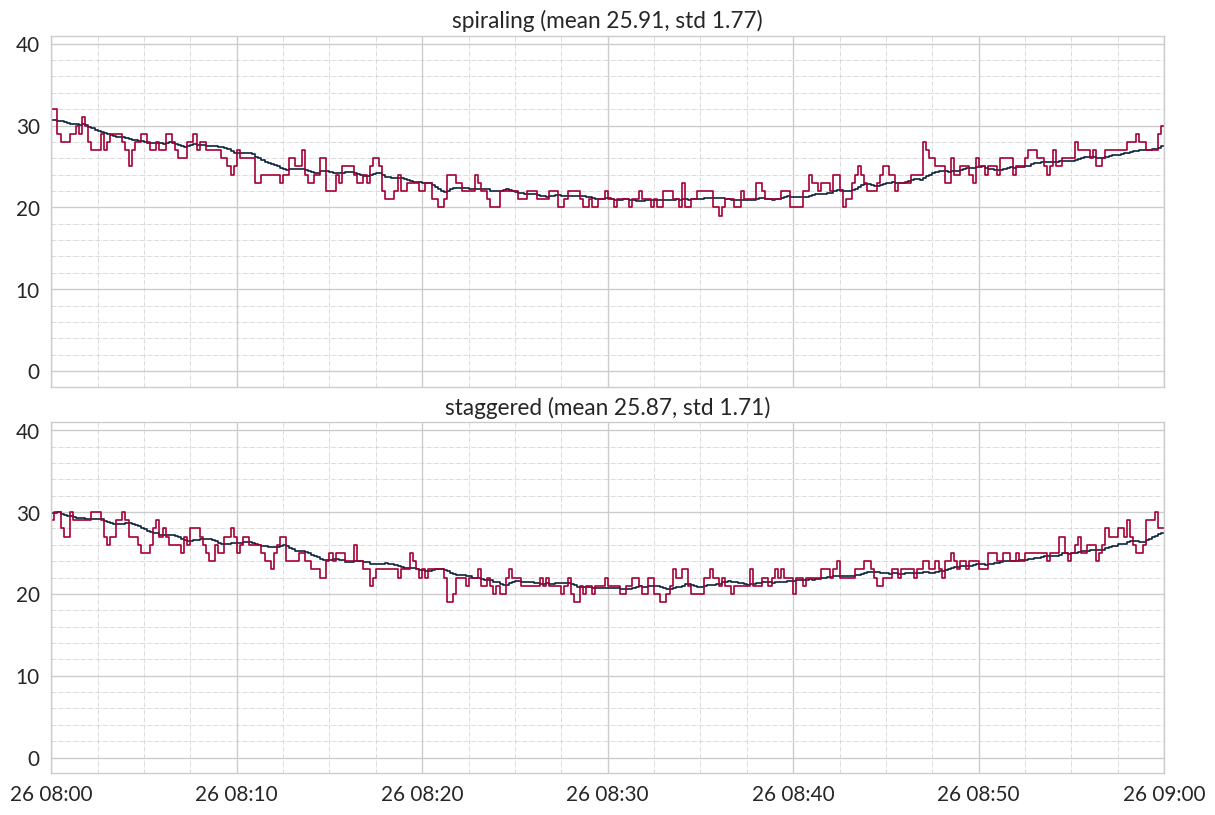

In [23]:
def plot_spiraling_vs_staggered(df_spiraling, df_staggered):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[12, 8], sharex="all")

    mean, std, mean_line = calculate_statistics(df_spiraling)
    ax1.step(df_spiraling.index, mean_line)
    ax1.step(df_spiraling.index, df_spiraling["panels_vis_ill_moon"])
    ax1.set_title(f"spiraling (mean {mean:.2f}, std {std:.2f})")

    mean, std, mean_line = calculate_statistics(df_staggered)
    ax2.step(df_staggered.index, mean_line)
    ax2.step(df_staggered.index, df_staggered["panels_vis_ill_moon"])
    ax2.set_title(f"staggered (mean {mean:.2f}, std {std:.2f})")

    plt.xlim(datetime(2010, 6, 26, 8, 0), datetime(2010, 6, 26, 9, 0))

    format_plot()

plot_spiraling_vs_staggered(df_spiraling, df_staggered)

As expected, the more evenly spaced staggered panels provide (slightly) more consistent coverage than the spiraling panels, although slightly more spiraling panels are visible on average.

# Number of panels

In [24]:
metadata, runs = load_all_simulation_results("../results/number_of_panels_test", load_runs=True)
metadata.sort_values("number_of_panels_moon", inplace=True)
metadata

100%|██████████| 5/5 [00:01<00:00,  2.96it/s]


,id,hostname,start_timestamp,save_dir,simulation_start,target_type,use_occultation,use_moon_radiation,number_of_panels_moon,thermal_type,use_instantaneous_reradiation,simulation_duration,step_size,walltime_duration
1,03345,eudoxos,2023-01-27T14:42:53.399730,/home2/dominik/dev/lropy/results/number_of_pan...,2010 JUN 26 06:00:00,Cannonball,True,True,2000,AngleBased,False,13560,10,367.067107
2,885c9,eudoxos,2023-01-27T14:42:53.399766,/home2/dominik/dev/lropy/results/number_of_pan...,2010 JUN 26 06:00:00,Cannonball,True,True,5000,AngleBased,False,13560,10,456.039422
4,18dcd,eudoxos,2023-01-27T14:42:53.399849,/home2/dominik/dev/lropy/results/number_of_pan...,2010 JUN 26 06:00:00,Cannonball,True,True,10000,AngleBased,False,13560,10,613.393433
3,b5a23,eudoxos,2023-01-27T14:42:53.399828,/home2/dominik/dev/lropy/results/number_of_pan...,2010 JUN 26 06:00:00,Cannonball,True,True,20000,AngleBased,False,13560,10,966.434892
5,0565f,eudoxos,2023-01-27T14:42:53.399864,/home2/dominik/dev/lropy/results/number_of_pan...,2010 JUN 26 06:00:00,Cannonball,True,True,50000,AngleBased,False,13560,10,1727.133185


In [25]:
df_2k = runs[metadata[metadata["number_of_panels_moon"] == 2000].index[0]]
df_20k = runs[metadata[metadata["number_of_panels_moon"] == 20000].index[0]]

In [26]:
final_pos1 = df_2k.iloc[-1][pos_names].to_numpy()
final_pos2 = df_20k.iloc[-1][pos_names].to_numpy()
final_pos_diff = np.linalg.norm(final_pos1 - final_pos2)
final_pos_diff_rel = final_pos_diff / np.linalg.norm(final_pos1)
print(f"% difference of final position between 2k and 20k: {final_pos_diff_rel:.10%}")

% difference of final position between 2k and 20k: 0.0000000690%


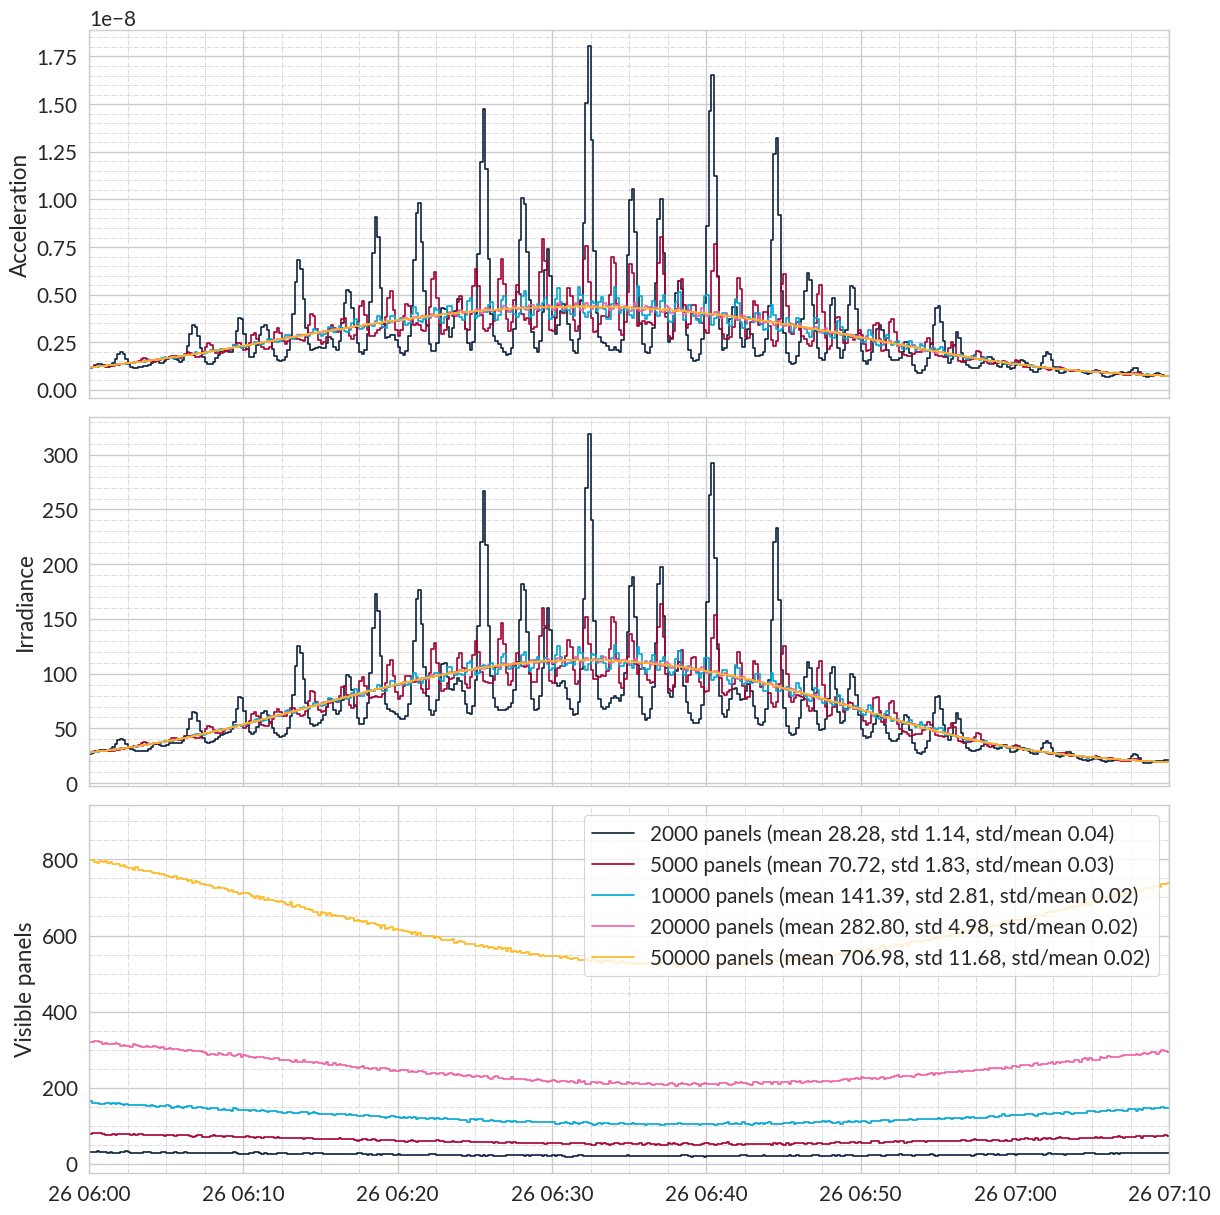

In [27]:
def plot_few_vs_many(metadata, runs):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[12, 12], sharex="all", sharey="none")

    for row in metadata.itertuples():
        run = runs[row.Index]
        mean, std, _ = calculate_statistics(run)
        label = f"{row.number_of_panels_moon} panels (mean {mean:.2f}, std {std:.2f}, std/mean {std/mean:.2f})"

        ax1.step(run.index, run["acc_rp_moon"], label=label)
        ax2.step(run.index, run["irr_moon"], label=label)
        ax3.step(run.index, run["panels_vis_ill_moon"], label=label)
    
    ax1.set_ylabel("Acceleration")
    ax2.set_ylabel("Irradiance")
    ax3.set_ylabel("Visible panels")

    # plt.xlim(datetime(2010, 6, 26, 8, 20), datetime(2010, 6, 26, 8, 40))
    # plt.xlim(datetime(2010, 6, 26, 7, 20), datetime(2010, 6, 26, 7, 40))
    plt.xlim(datetime(2010, 6, 26, 6), datetime(2010, 6, 26, 7, 10))
    # ax3.set_ylim(18, 28)
    # ax3.set_ylim(200, 230)
    plt.legend()

    format_plot()

plot_few_vs_many(metadata, runs)

* Significantly less noise when 30+ panels are visible
* When more panels are visible, irradiance received by LRO is lower; this is only coincidental
* Number of visible panels varies because altitude of LRO varies between 40 km and 65 km
* Irradiance varies because sun is not perfectly perpendicular to orbit (beta angle about 80 deg)

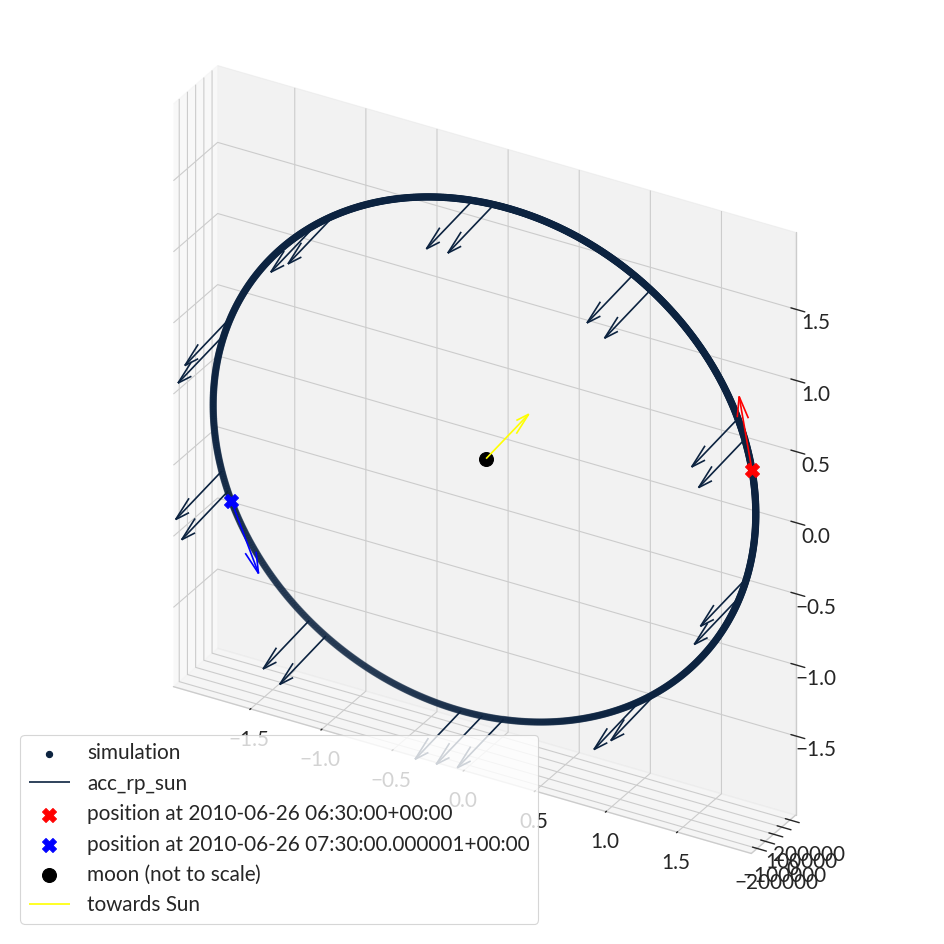

In [28]:
def plot_orbit_3d(df_ephemeris, df_simulation):
    def do_plot_with_acc(df, label, acc_name):
        ax.scatter(df["pos_x"], df["pos_y"], df["pos_z"], label=label)
        df = df.iloc[::int(len(df.index) / 20)]
        acc = df[[f"{acc_name}_x", f"{acc_name}_y", f"{acc_name}_z"]]
        acc /= abs(acc.mean().mean())
        ax.quiver(df["pos_x"], df["pos_y"], df["pos_z"],
                  acc[f"{acc_name}_x"], acc[f"{acc_name}_y"], acc[f"{acc_name}_z"], length=2e5, zorder=-1, label=acc_name)
    
    def do_plot_pos_at_time(time, color="black"):
        ts = pd.to_datetime(time)
        nearest_ts = df_simulation.index[df_simulation.index.get_indexer([ts], method='nearest')][0]
        df_pos = df_simulation.loc[nearest_ts]
        ax.quiver(df_pos["pos_x"], df_pos["pos_y"], df_pos["pos_z"], df_pos["vel_x"], df_pos["vel_y"], df_pos["vel_z"], color=color, length=5e5, normalize=True)
        ax.scatter(df_pos["pos_x"], df_pos["pos_y"], df_pos["pos_z"], c=color, marker="X", s=100, label=f"position at {nearest_ts}", zorder=5)
   
    fig = plt.figure(figsize=[12, 12])
    ax = fig.add_subplot(projection='3d', proj_type="ortho", computed_zorder=False)
    
    do_plot_with_acc(df_simulation, "simulation", "acc_rp_sun")
    
    do_plot_pos_at_time("2010-06-26 06:30 UTC", "red")
    do_plot_pos_at_time("2010-06-26 07:30 UTC", "blue")
    
    ax.scatter(0, 0, 0, c="black", s=100, label="moon (not to scale)")
    
    pos_sun_init = df_simulation[["pos_sun_x", "pos_sun_y", "pos_sun_z"]].iloc[0] / df_simulation["r_sun"].iloc[0]
    ax.quiver(0, 0, 0, *pos_sun_init, length=6e5, color="yellow", label="towards Sun")
    
    ax.set_aspect("equal")
    # ax.view_init(90, -90)
    # ax.view_init(0, -90)
    
    plt.legend()

df_ephemeris = generate_lro_ephemeris(df_20k["t_et"])
plot_orbit_3d(df_ephemeris, df_20k)

# Static vs dynamic

In [29]:
metadata, runs = load_all_simulation_results("../results/static_vs_dynamic-2023-07-18T13-31-43-e8cf0", load_runs=True)
metadata

100%|██████████| 9/9 [00:01<00:00,  5.52it/s]


,id,hostname,start_timestamp,save_dir,simulation_start,target_type,with_instantaneous_reradiation,use_occultation,use_solar_radiation,use_moon_radiation,paneling_moon,number_of_panels_moon,number_of_panels_per_ring_moon,albedo_distribution_moon,thermal_type_moon,simulation_duration,step_size,walltime_duration
1,c82f9,eudoxos,2023-07-18T13:31:43.370114,/home2/dominik/dev/lropy/results/static_vs_dyn...,2010 JUN 26 06:00:00,Cannonball,False,False,True,True,Dynamic,0,"[24, 36, 48]",DLAM1,NoThermal,13560,10,317.695942
2,31f47,eudoxos,2023-07-18T13:31:43.370135,/home2/dominik/dev/lropy/results/static_vs_dyn...,2010 JUN 26 06:00:00,Cannonball,False,False,True,True,Static,15000,[],Constant,NoThermal,13560,10,435.34299
3,1af69,eudoxos,2023-07-18T13:31:43.370167,/home2/dominik/dev/lropy/results/static_vs_dyn...,2010 SEP 26 06:00:00,Cannonball,False,False,True,True,Dynamic,0,"[24, 36, 48]",DLAM1,NoThermal,13560,10,314.015171
4,74370,eudoxos,2023-07-18T13:31:43.370189,/home2/dominik/dev/lropy/results/static_vs_dyn...,2010 SEP 26 06:00:00,Cannonball,False,False,True,True,Dynamic,0,"[24, 36, 48]",Constant,NoThermal,13560,10,176.625606
5,cb08e,eudoxos,2023-07-18T13:31:43.370207,/home2/dominik/dev/lropy/results/static_vs_dyn...,2010 SEP 26 06:00:00,Cannonball,False,False,True,True,Static,15000,[],DLAM1,NoThermal,13560,10,433.916343
6,98610,eudoxos,2023-07-18T13:31:43.370220,/home2/dominik/dev/lropy/results/static_vs_dyn...,2010 JUN 26 06:00:00,Cannonball,False,False,True,True,Static,15000,[],DLAM1,NoThermal,13560,10,428.255204
7,d9c07,eudoxos,2023-07-18T13:31:43.370237,/home2/dominik/dev/lropy/results/static_vs_dyn...,2010 SEP 26 06:00:00,Cannonball,False,False,True,True,Static,15000,[],Constant,NoThermal,13560,10,434.389247
8,7ffd7,eudoxos,2023-07-18T13:31:43.370256,/home2/dominik/dev/lropy/results/static_vs_dyn...,2010 JUN 26 06:00:00,Cannonball,False,False,True,True,Dynamic,0,"[24, 36, 48]",Constant,NoThermal,13560,10,178.24701
9,2d19b,eudoxos,2023-07-18T13:31:43.370271,/home2/dominik/dev/lropy/results/static_vs_dyn...,2010 JUN 26 06:00:00,Cannonball,False,False,False,False,,0,[],,,13560,10,149.0959


In [30]:
def plot_static_vs_dynamic(runs, metadata, date):
    metadata = metadata[metadata["simulation_start"] == date]
    df_static_const = runs[metadata[(metadata["paneling_moon"] == "Static") & (metadata["albedo_distribution_moon"] == "Constant")].index[0]]
    df_dynamic_const = runs[metadata[(metadata["paneling_moon"] == "Dynamic") & (metadata["albedo_distribution_moon"] == "Constant")].index[0]]
    df_static_sh = runs[metadata[(metadata["paneling_moon"] == "Static") & (metadata["albedo_distribution_moon"] == "DLAM1")].index[0]]
    df_dynamic_sh = runs[metadata[(metadata["paneling_moon"] == "Dynamic") & (metadata["albedo_distribution_moon"] == "DLAM1")].index[0]]

    fig, ((ax_static_const, ax_dynamic_const), (ax_static_sh, ax_dynamic_sh)) = plt.subplots(2, 2, figsize=[12, 6], sharex="all", sharey="all")

    ax_static_const.step(df_static_const.index, df_static_const["acc_rp_moon"])
    ax_static_const.set_title("Static paneling with constant albedo")

    ax_dynamic_const.step(df_dynamic_const.index, df_dynamic_const["acc_rp_moon"])
    ax_dynamic_const.set_title("Dynamic paneling with constant albedo")

    ax_static_sh.step(df_static_sh.index, df_static_sh["acc_rp_moon"])
    ax_static_sh.set_title("Static paneling with SH albedo")

    ax_dynamic_sh.step(df_dynamic_sh.index, df_dynamic_sh["acc_rp_moon"])
    ax_dynamic_sh.set_title("Dynamic paneling with SH albedo")

    # ax1.set_ylabel("Acceleration")

    # plt.xlim(datetime(2010, 6, 26, 8, 20), datetime(2010, 6, 26, 8, 40))
    # plt.xlim(datetime(2010, 6, 26, 7, 20), datetime(2010, 6, 26, 7, 40))
    # plt.xlim(datetime(2010, 6, 26, 6), datetime(2010, 6, 26, 7, 10))
    # ax3.set_ylim(18, 28)
    # ax3.set_ylim(200, 230)

    format_plot()

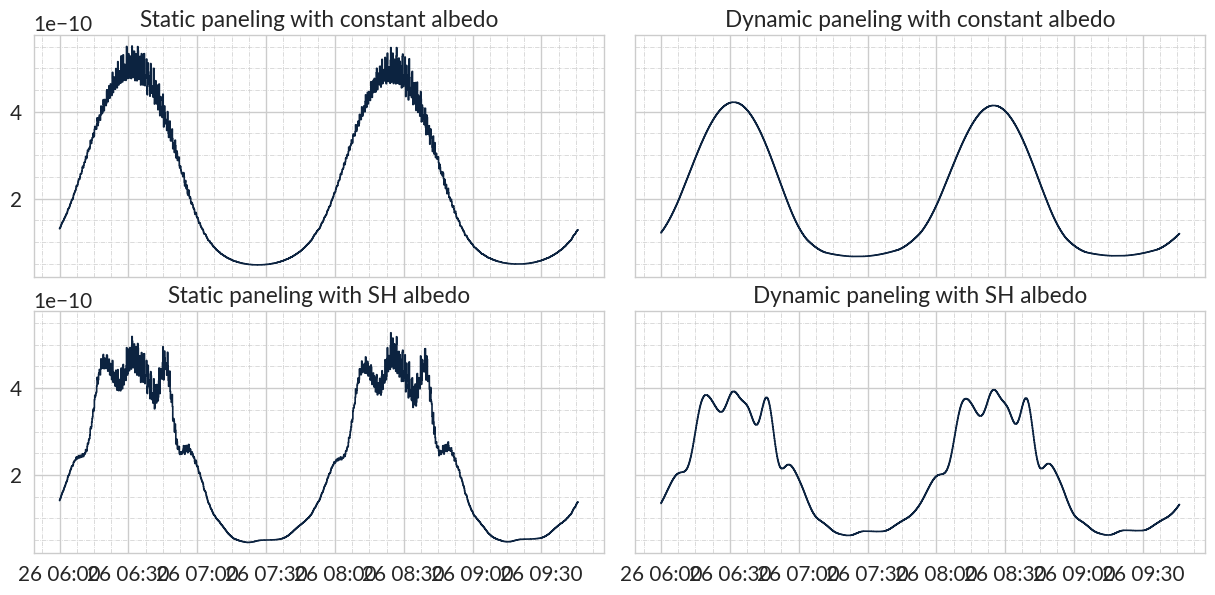

In [31]:
plot_static_vs_dynamic(runs, metadata, "2010 JUN 26 06:00:00")

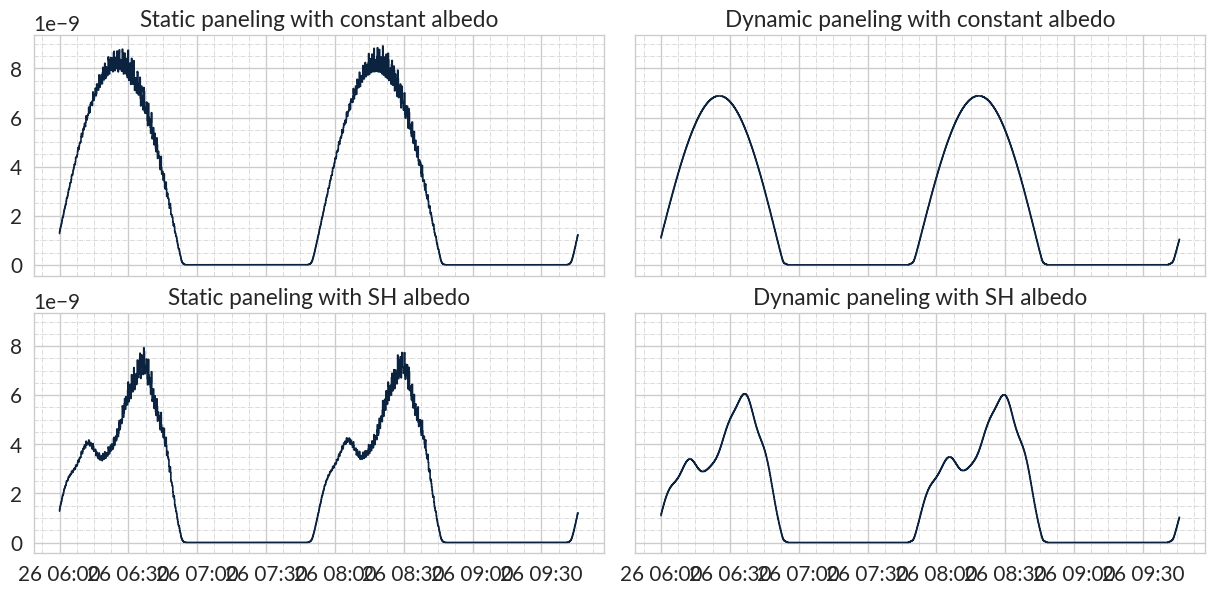

In [32]:
plot_static_vs_dynamic(runs, metadata, "2010 SEP 26 06:00:00")